In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, f1_score, accuracy_score , precision_score, recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
#df=pd.read_csv('./dataset/Encoded.csv')
df = pd.read_csv('./dataset/Encoded_binary.csv')
df.shape

(68000, 44)

In [3]:
df['readmitted'].value_counts() 

0    34000
1    34000
Name: readmitted, dtype: int64

In [4]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[2 1 8 ... 0 1 0]
 [2 1 6 ... 0 0 1]
 [0 0 7 ... 0 0 1]
 ...
 [4 0 7 ... 0 1 1]
 [0 0 7 ... 0 0 1]
 [0 1 8 ... 0 0 1]]
[0 0 0 ... 1 1 1]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Test case function**

In [6]:
def test_model(model):
    li_score={}
    # Predict probabilities for test set
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    print('ROC AUC Score:', roc_auc)
   
    
    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print('F1 Score:', f1)
    


    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)
    


    # calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('Precision:', precision)
    print('Recall:', recall)

    li_score.update({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f1_score':f1,'ROC score':roc_auc}) 
    
    
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted as readmitted")
    plt.ylabel("Actually readmitted")
    plt.show()
    
    return(li_score)

**LOGISTIC REGRESSION**

In [7]:
#Changing the model a bit
from sklearn.linear_model import LogisticRegression
lg_new=LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42)
lg_new.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

ROC AUC Score: 0.6130043595731491
F1 Score: 0.5612127708444989
Accuracy Score: 0.5786029411764706
Precision: 0.596419853539463
Recall: 0.5299305957200694


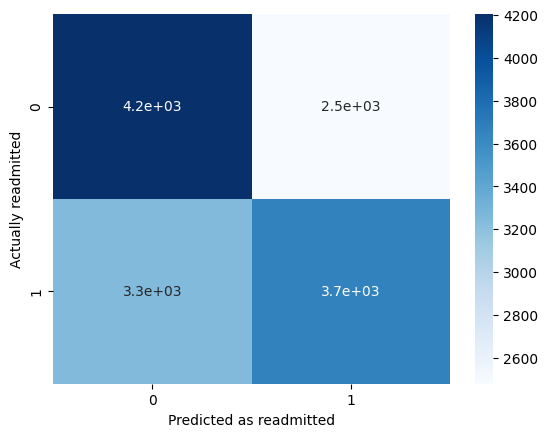

In [8]:
Log_R=test_model(lg_new)

**Random forest**

In [9]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

ROC AUC Score: 0.6103781628148538
F1 Score: 0.5804282686545348
Accuracy Score: 0.5778676470588235
Precision: 0.5868183833308704
Recall: 0.5741758241758241


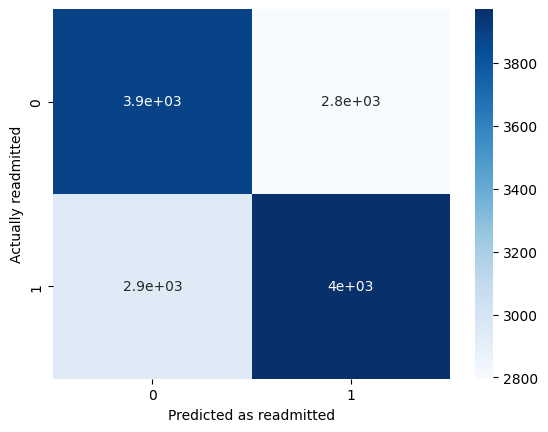

In [10]:
Rand_forest=test_model(rm)

In [11]:
print(rm.feature_importances_)

[2.65879478e-02 1.73890766e-02 6.09356880e-02 3.42083587e-02
 4.28094450e-02 3.29445975e-02 7.01654461e-02 1.18111754e-01
 3.76636656e-02 9.90719950e-02 2.44489947e-02 1.84473916e-02
 5.18183985e-02 5.79772553e-02 5.21531494e-02 5.03238545e-02
 5.30067259e-02 8.20184323e-03 1.99786198e-02 1.55042373e-02
 4.69200226e-03 2.62491624e-03 4.65345939e-04 9.74108797e-03
 7.08222247e-06 1.36599934e-02 1.22714716e-02 1.44206321e-04
 1.16436222e-02 1.01267120e-02 1.35196987e-03 1.70214664e-04
 1.78345119e-05 1.57538676e-04 1.31534090e-02 2.94773400e-03
 8.86905064e-05 3.76457781e-06 0.00000000e+00 0.00000000e+00
 1.45570276e-02 1.04269315e-02]


**Decision tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

ROC AUC Score: 0.5420670967745285
F1 Score: 0.5198231282320318
Accuracy Score: 0.5288970588235294
Precision: 0.5395985685389761
Recall: 0.5014459224985541


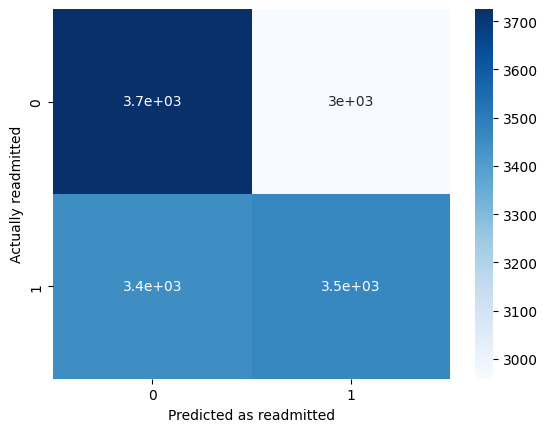

In [13]:
d_tree=test_model(dtree)

**GRADIENT BOOSTING**

In [14]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

ROC AUC Score: 0.6385308622682241
F1 Score: 0.6032438722816204
Accuracy Score: 0.5988970588235294
Precision: 0.6069076540319039
Recall: 0.599624060150376


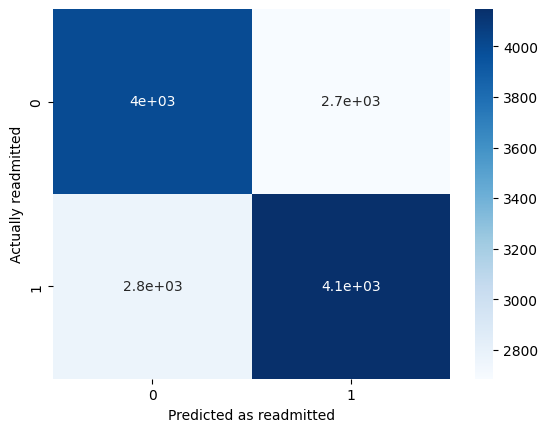

In [15]:
grad_boost=test_model(xgb)

### RESULTS

In [16]:
print(Log_R,Rand_forest,d_tree,grad_boost)
model={
    'LogisticRegression':Log_R,
    'Random forest':Rand_forest,
    'Decision Tree Classifier':d_tree,
    'Gradient Boosting':grad_boost
}

{'Accuracy': 0.5786029411764706, 'Precision': 0.596419853539463, 'Recall': 0.5299305957200694, 'f1_score': 0.5612127708444989, 'ROC score': 0.6130043595731491} {'Accuracy': 0.5778676470588235, 'Precision': 0.5868183833308704, 'Recall': 0.5741758241758241, 'f1_score': 0.5804282686545348, 'ROC score': 0.6103781628148538} {'Accuracy': 0.5288970588235294, 'Precision': 0.5395985685389761, 'Recall': 0.5014459224985541, 'f1_score': 0.5198231282320318, 'ROC score': 0.5420670967745285} {'Accuracy': 0.5988970588235294, 'Precision': 0.6069076540319039, 'Recall': 0.599624060150376, 'f1_score': 0.6032438722816204, 'ROC score': 0.6385308622682241}


In [17]:
def create_metrics_table(metrics_dict):
    df = pd.DataFrame(metrics_dict)
    df = df.transpose()
    df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 score','Roc score']
    df.index.name = 'Model'
    return df

In [18]:
table=create_metrics_table(model)
print(table)

                          Accuracy  Precision    Recall  F1 score  Roc score
Model                                                                       
LogisticRegression        0.578603   0.596420  0.529931  0.561213   0.613004
Random forest             0.577868   0.586818  0.574176  0.580428   0.610378
Decision Tree Classifier  0.528897   0.539599  0.501446  0.519823   0.542067
Gradient Boosting         0.598897   0.606908  0.599624  0.603244   0.638531
